**Rectangular Cut for Signal and Background Separation**

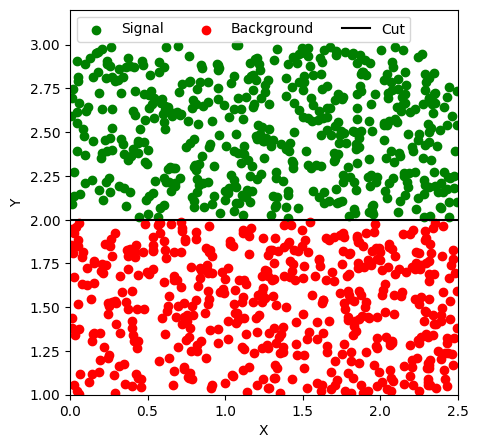

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the size of the dataset
data_size = 500

# Generate random signal data in the range [0.0, 2.5) for x and [2.01, 3.0) for y
signal_x = np.random.uniform(low=0.0, high=2.5, size=(data_size,))
signal_y = np.random.uniform(low=2.01, high=3.0, size=(data_size,))
signal_data = np.column_stack((signal_x, signal_y))

# Generate random background data in the range [0.0, 2.5) for x and [1.0, 1.99) for y
background_x = np.random.uniform(low=0.0, high=2.5, size=(data_size,))
background_y = np.random.uniform(low=1.0, high=1.99, size=(data_size,))
background_data = np.column_stack((background_x, background_y))

# Define parameters for a straight line equation (y = mx + n)
m, n = 0, 2

# Generate x values for the line
x = np.arange(-3.0, 3.0, 0.5)

# Calculate corresponding y values for the line
y = m*x + n

# Plotting
plt.figure(1, figsize=(5,5))

# Scatter plot for signal data in green
plt.scatter(signal_data[:, 0], signal_data[:, 1], color='green', label="Signal")

# Scatter plot for background data in red
plt.scatter(background_data[:, 0], background_data[:, 1], color='red', label="Background")

# Plot the cut line in black
plt.plot(x, y, color='black', label= 'Cut')

# Set x and y axis limits
plt.xlim(0, 2.5)
plt.ylim(1, 3.2)

# Set axis labels
plt.xlabel("X")
plt.ylabel("Y")

# Display legend in the upper left corner with 3 columns
plt.legend(loc="upper left", ncol=3)

# Show the plot
plt.show()


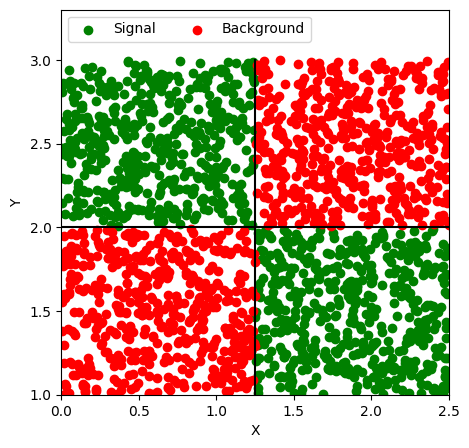

In [10]:
# Set the size of the dataset
data_size = 500

# Generate signal data with two separate ranges for x and y
signal_x = np.append(np.random.uniform(low=0.0, high=1.25, size=(data_size,)), np.random.uniform(low=1.25, high=2.5, size=(data_size,)))
signal_y = np.append(np.random.uniform(low=2.01, high=3.0, size=(data_size,)), np.random.uniform(low=1.00, high=1.99, size=(data_size,)))
signal_data = np.column_stack((signal_x, signal_y))

# Generate background data with two separate ranges for x and y
background_x = np.append(np.random.uniform(low=0.0, high=1.25, size=(data_size,)), np.random.uniform(low=1.25, high=2.5, size=(data_size,)))
background_y = np.append(np.random.uniform(low=1.00, high=1.99, size=(data_size,)), np.random.uniform(low=2.01, high=3.0, size=(data_size,)))
background_data = np.column_stack((background_x, background_y))

# Plotting
plt.figure(1, figsize=(5, 5))

# Scatter plot for signal data in green
plt.scatter(signal_data[:, 0], signal_data[:, 1], color='green', label="Signal")

# Scatter plot for background data in red
plt.scatter(background_data[:, 0], background_data[:, 1], color='red', label="Background")

# Display legend in the upper left corner with 2 columns
plt.legend(loc="upper left", ncol=2)

# Plot the first cut line (horizontal) in black
m, n = 0, 2
x = np.arange(-3.0, 3.0, 0.5)
y = m*x + n
plt.plot(x, y, color='black', label='Cut')

# Plot the second cut line (vertical) in black
m, n = 1.25, 1.25
y = np.arange(0, 3.5, 0.5)
x = np.full_like(y, 1.25)

plt.plot(x, y, color='black', label='Cut')

# Set x and y axis limits
plt.xlim(0, 2.5)
plt.ylim(1, 3.3)

# Set axis labels
plt.xlabel("X")
plt.ylabel("Y")

# Show the plot
plt.show()

**Separation for Complicated Distributions**

**Data Generation**

In [3]:
# Define a signal function that generates random values based on a function
def signal_function(x):
    min_val, max_val = np.sin(x) + x + x * np.sin(x), 20
    return np.random.uniform(low=min_val, high=max_val, size=(1,))

# Define a background function that generates random values based on a function
def background_function(x):
    min_val, max_val = -20, np.sin(x) + x + x * np.sin(x)
    return np.random.uniform(low=min_val, high=max_val, size=(1,))

# Define a function to calculate efficiency metrics
def efficiency(data_size, m, n, signal_data, background_data):
    tp = 0 
    fp = 0
    fn = 0
    tn = 0    
    for i in range(len(signal_data)): 
        # Check if signal point is classified as signal (True Positive)
        if signal_data[i,1] > m * signal_data[i,0] + n:
            tp += 1
        # Check if background point is misclassified as signal (False Positive)
        if background_data[i,1] > m * background_data[i,0] + n:
            fp += 1        
        # Check if signal point is misclassified as background (False Negative)
        if signal_data[i,1] < m * signal_data[i,0] + n:
            fn += 1
        # Check if background point is correctly classified as background (True Negative)
        if background_data[i,1] < m * background_data[i,0] + n:
            tn += 1

    # Calculate true positive rate and false positive rate
    true_positive_rate = [0.0, tp / (tp + fn), 1.]
    false_positive_rate = [0.0, fp / (fp + tn), 1.]

    # Print results
    print("True Positive Rate:", true_positive_rate)
    print("False Positive Rate:", false_positive_rate)
    print("True Positives:", tp)
    print("True Negatives:", tn)
    print("Accuracy =", (tp + tn) / (len(signal_data) + len(background_data)))

    return true_positive_rate, false_positive_rate

# Generate synthetic data for signal and background
data_size = 3000

# Generate signal data
signal_x = np.random.uniform(low=-11.0, high=10.0, size=(data_size,))
signal_y = np.zeros(data_size, dtype=float)
signal_label = np.ones(data_size)
for i in range(len(signal_x)):
    signal_y[i] = signal_function(signal_x[i])
signal_data = np.column_stack((signal_x, signal_y, signal_label))

# Generate background data
background_x = np.random.uniform(low=-11.0, high=10.0, size=(data_size,))
background_y = np.zeros(data_size, dtype=float)
background_label = np.zeros(data_size)
for i in range(len(background_x)):
    background_y[i] = background_function(background_x[i])
background_data = np.column_stack((background_x, background_y, background_label))

/var/folders/h1/s46zdkz905j6q1vd7vxjj6v40000gn/T/ipykernel_20235/379002996.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal_y[i] = signal_function(signal_x[i])
/var/folders/h1/s46zdkz905j6q1vd7vxjj6v40000gn/T/ipykernel_20235/379002996.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  background_y[i] = background_function(background_x[i])


True Positive Rate: [0.0, 0.8223333333333334, 1.0]
False Positive Rate: [0.0, 0.021, 1.0]
True Positives: 2467
True Negatives: 2937
Accuracy = 0.9006666666666666


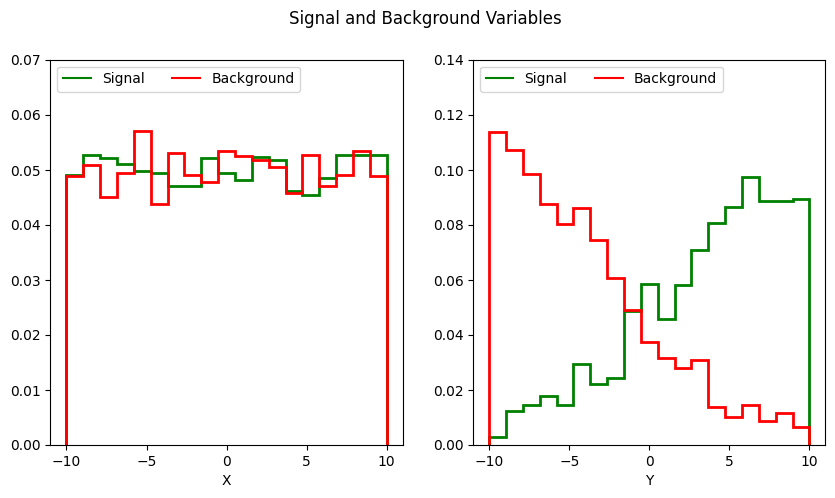

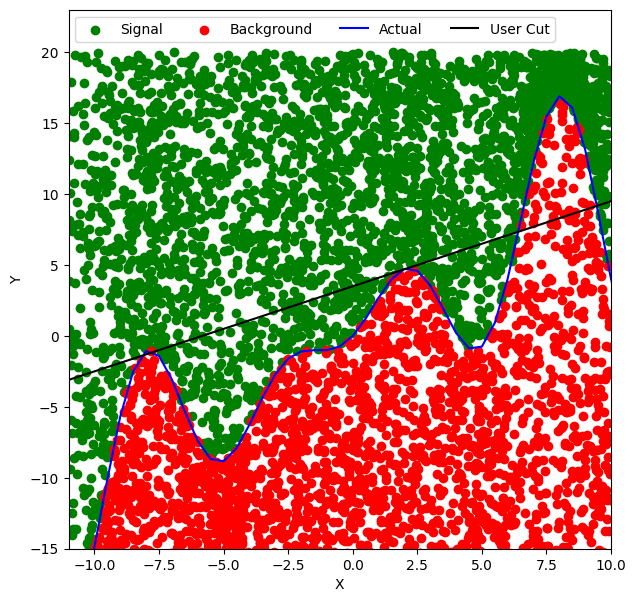

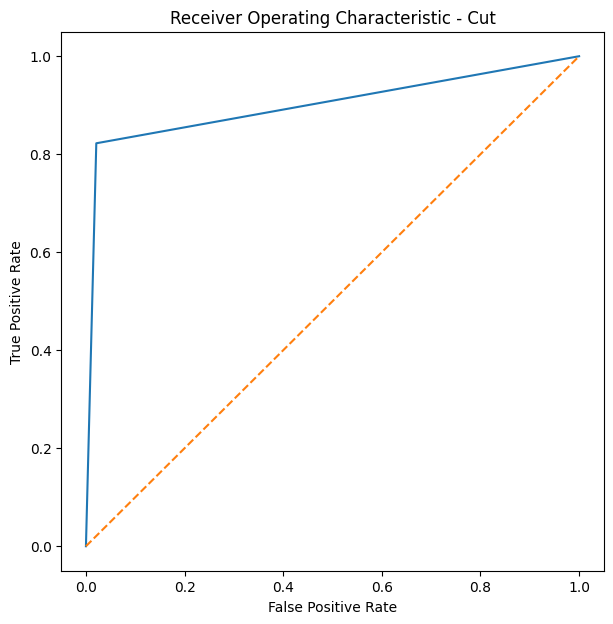

In [4]:
# Parameters for the estimated line
m_est, n_est = 0.6, 3.5

# Generate x values for plotting
x = np.arange(-12, 12, 0.5)

# Calculate y values for the estimated line
y_est = m_est * x + n_est

# Calculate y values for the actual function
y_actual = np.sin(x) + x + x * np.sin(x)

# Calculate true positive rate and false positive rate using the efficiency function
tp_rate, fp_rate = efficiency(data_size, m_est, n_est, signal_data, background_data)

# Create bins for histogram plots
bins = np.linspace(-10, 10, 20)

# Create subplots for histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Signal and Background Variables')

# Plot histograms for X values
ax1.hist(signal_x, bins, histtype='step', label='Signal', color='green', density=True, linewidth=2)
ax1.hist(background_x, bins, histtype='step', label='Background', color='red', density=True, linewidth=2)
ax1.set_xlabel('X')
handles, labels = ax1.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
ax1.set_ylim(0, 0.07)
ax1.legend(handles=new_handles, labels=labels, loc="upper left", ncol=4)

# Plot histograms for Y values
ax2.hist(signal_y, bins, histtype='step', label='Signal', color='green', density=True, linewidth=2)
ax2.hist(background_y, bins, histtype='step', label='Background', color='red', density=True, linewidth=2)
ax2.set_xlabel('Y')
ax2.set_ylim(0, 0.14)
ax2.legend(handles=new_handles, labels=labels, loc="upper left", ncol=4)

# Show the histograms
plt.show()

# Plot the actual data points along with the actual function and estimated line
plt.figure(1, figsize=(7, 7))
plt.scatter(signal_data[:, 0], signal_data[:, 1], color='green', label="Signal")
plt.scatter(background_data[:, 0], background_data[:, 1], color='red', label="Background")
plt.plot(x, y_actual, color='blue', label='Actual')
plt.plot(x, y_est, color='black', label='User Cut')  # Uncomment this line if you want to plot the estimated line
plt.legend(loc="upper left", ncol=4)
plt.xlim(-11, 10)
plt.ylim(-15, 23)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Plot the Receiver Operating Characteristic (ROC) curve
plt.figure(1, figsize=(7, 7))
plt.title('Receiver Operating Characteristic - Cut')
plt.plot(fp_rate, tp_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.980


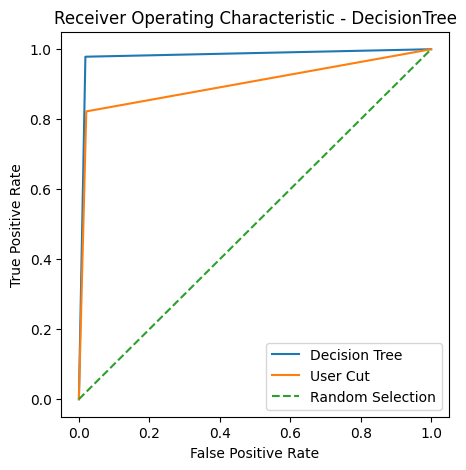

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Combine signal and background data and shuffle it
data = np.vstack((signal_data, background_data))
np.random.shuffle(data)

# Elements of Data and Class
X = data[:, :2]
Y = data[:, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a decision tree classifier
dtc = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

# Train the classifier on the training data
dtc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dtc.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Compute the Receiver Operating Characteristic (ROC) curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.subplots(1, figsize=(5, 5))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate, label='Decision Tree')
plt.plot(fp_rate, tp_rate, label='User Cut')
plt.plot([0, 1], ls="--", label='Random Selection')
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

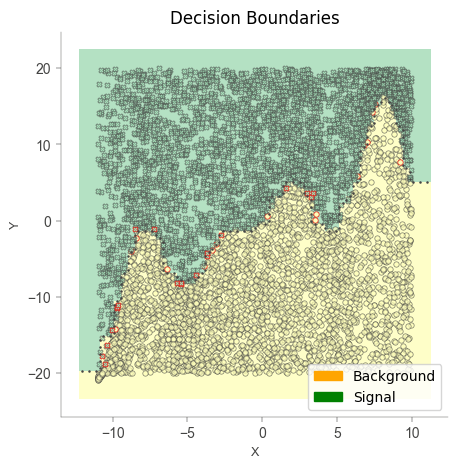

In [7]:
from dtreeviz import decision_boundaries
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot decision boundaries using dtreeviz
decision_boundaries(
    dtc, X, Y, ax=ax,
    dot_w=15,
    tile_fraction=1.0,
    markers=['o', 'X'],  # use different markers for classes
    feature_names=['X', 'Y'],
    class_names=list(['Background', 'Signal'])
)

# Add legend for classes
background_patch = mpatches.Patch(color='orange', label='Background')
signal_patch = mpatches.Patch(color='green', label='Signal')
ax.legend(handles=[background_patch, signal_patch])

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Decision Boundaries')

# Display the plot
plt.show()

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

# Create StringIO object to store the DOT format data
dot_data = StringIO()

# Export the decision tree to the DOT format
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=['x', 'y'],  
                           class_names=['Background', 'Signal'],
                           filled=True)

# Create a graph from the DOT format data using graphviz
graph = graphviz.Source(dot_data, format="png")

# Alternatively, you can use pydotplus to create a graph from DOT format data
graph = pydotplus.graph_from_dot_data(dot_data) 

# Write the decision tree graph to a PNG file
graph.write_png('my_decision_tree.png')

True